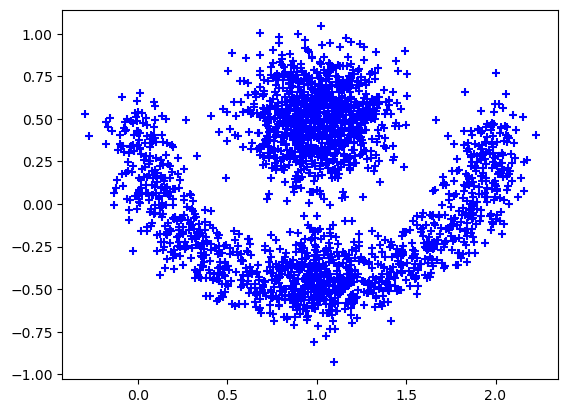

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# Read the Excel file
combined = pd.read_excel('combined_data.xlsx')

# Plot the scatter plot
plt.scatter(combined[0], combined[1], c='blue', s=40, marker='+')
plt.show()

In [2]:
import numpy as np
combined = combined.values
sample_size = int(len(combined) * 0.5)

# 随机选择索引进行下采样
indices = np.random.choice(len(combined), size=sample_size, replace=False)
downsampled_combined = combined[indices]

In [3]:
from sklearn.neighbors import NearestNeighbors
import math
def euclidean_distance(x1, x2):
     return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

def mean_shift(pixel_list, k):
    centroids = np.copy(pixel_list)
    # Create a k-NN model
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(pixel_list)
    
    for i, centroid in enumerate(centroids):
        # Find the k nearest neighbors of the centroid
        _, indices = knn.kneighbors([centroid])
        neighbors = pixel_list[indices[0]]
        
        # Calculate distances and weights using only the neighbors
        distances = euclidean_distance(neighbors, centroid)
        weights = np.exp(-0.5 * distances  ** 2)
        
        # Update the centroid
        numerator = np.sum(neighbors * weights[:, np.newaxis], axis=0)
        denominator = np.sum(weights)
        centroids[i] = numerator / denominator
    
    return np.round(centroids, 3)

In [4]:
def MaxValueDetect(original_pixel_list, Dom1, Dom2, Dom3, k):
    Keypoint = np.zeros(len(original_pixel_list))
    # Create a k-NN model
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(original_pixel_list)

    for i, centroid in enumerate(original_pixel_list):
        _, indices = knn.kneighbors([centroid])
        neighbors = np.concatenate((Dom1[indices[0]], Dom2[indices[0]], Dom3[indices[0]]), axis=0)
        neighbors_norm = np.sqrt(np.sum(neighbors ** 2, axis=1))
        Dom1_norm = np.sqrt(np.sum(Dom1[i] ** 2))
        Dom2_norm = np.sqrt(np.sum(Dom2[i] ** 2))
        Dom3_norm = np.sqrt(np.sum(Dom3[i] ** 2))
        
        max_neighbor_norm = np.max(neighbors_norm)
        if Dom1_norm == max_neighbor_norm or Dom2_norm == max_neighbor_norm or Dom3_norm == max_neighbor_norm:
            Keypoint[i] = 1

    return Keypoint

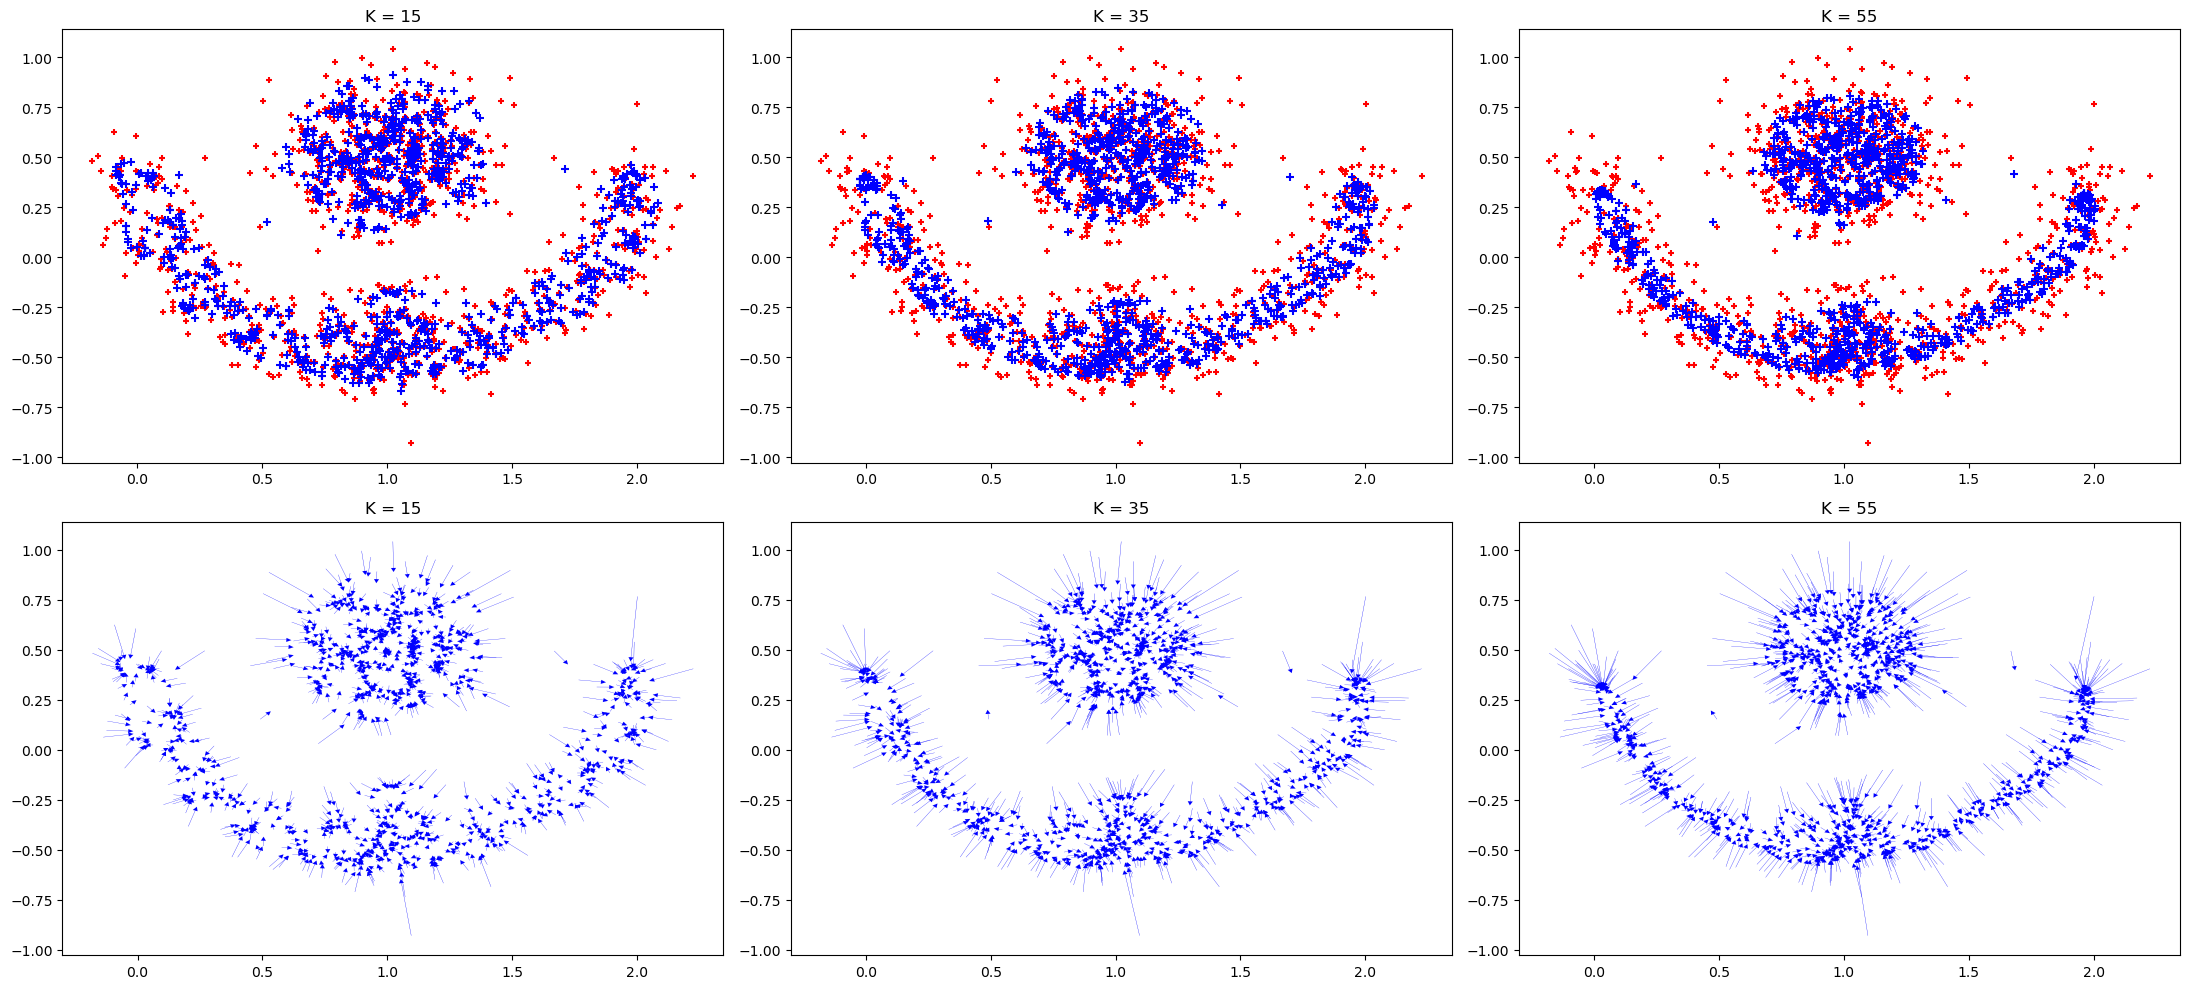

In [5]:
# 创建一个包含两行三列的子图布局
fig, axs = plt.subplots(2, 3, figsize=(22, 10))

# 带宽值列表
ks=[15, 35,55]
# 遍历每个带宽值
for i, k in enumerate(ks):
    # 计算新的质心
    new_centroids = mean_shift(downsampled_combined,k)
    
    # 绘制散点图
    axs[0, i].scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='red', s=20, marker='+')
    axs[0, i].scatter(new_centroids[:, 0], new_centroids[:, 1], c='blue', s=40, marker='+')
    axs[0, i].set_title(f'K = {k}')
    
    # 绘制箭头
    for j in range(len(new_centroids)):
        dx = new_centroids[j, 0] - downsampled_combined[j, 0]
        dy = new_centroids[j, 1] - downsampled_combined[j, 1]
        axs[1, i].arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], dx, dy, head_width=0.02, head_length=0.02, linewidth=0.02, fc='blue', ec='blue')
    axs[1, i].set_title(f'K = {k}')

plt.tight_layout()
plt.show()

In [6]:
k=15
vector_k15 = []

new_centroids_k15 = mean_shift(downsampled_combined,k)

for j in range(len(new_centroids)):
    dx = new_centroids_k15[j, 0] - downsampled_combined[j, 0]
    dy = new_centroids_k15[j, 1] - downsampled_combined[j, 1]
    vector_k15.append([dx, dy])

vector_k15 = np.array(vector_k15)

In [7]:
k=20
vector_k20 = []

new_centroids_k20 = mean_shift(downsampled_combined,k)

for j in range(len(new_centroids)):
    dx = new_centroids_k20[j, 0] - downsampled_combined[j, 0]
    dy = new_centroids_k20[j, 1] - downsampled_combined[j, 1]
    vector_k20.append([dx, dy])

vector_k20 = np.array(vector_k20)

In [8]:
k=25
vector_k25 = []

new_centroids_k25 = mean_shift(downsampled_combined,k)

for j in range(len(new_centroids)):
    dx = new_centroids_k25[j, 0] - downsampled_combined[j, 0]
    dy = new_centroids_k25[j, 1] - downsampled_combined[j, 1]
    vector_k25.append([dx, dy])

vector_k25 = np.array(vector_k25)

In [9]:
k=30
vector_k30 = []

new_centroids_k30 = mean_shift(downsampled_combined,k)

for j in range(len(new_centroids)):
    dx = new_centroids_k30[j, 0] - downsampled_combined[j, 0]
    dy = new_centroids_k30[j, 1] - downsampled_combined[j, 1]
    vector_k30.append([dx, dy])

vector_k30 = np.array(vector_k30)

In [15]:
k=35
vector_k35 = []

new_centroids_k35 = mean_shift(downsampled_combined,k)

for j in range(len(new_centroids)):
    dx = new_centroids_k35[j, 0] - downsampled_combined[j, 0]
    dy = new_centroids_k35[j, 1] - downsampled_combined[j, 1]
    vector_k35.append([dx, dy])

vector_k35 = np.array(vector_k35)

In [16]:
k=40
vector_k40 = []

new_centroids_k40 = mean_shift(downsampled_combined,k)

for j in range(len(new_centroids)):
    dx = new_centroids_k40[j, 0] - downsampled_combined[j, 0]
    dy = new_centroids_k40[j, 1] - downsampled_combined[j, 1]
    vector_k40.append([dx, dy])

vector_k40 = np.array(vector_k40)

In [17]:
k=45
vector_k45 = []

new_centroids_k45 = mean_shift(downsampled_combined,k)

for j in range(len(new_centroids)):
    dx = new_centroids_k45[j, 0] - downsampled_combined[j, 0]
    dy = new_centroids_k45[j, 1] - downsampled_combined[j, 1]
    vector_k45.append([dx, dy])

vector_k45 = np.array(vector_k45)

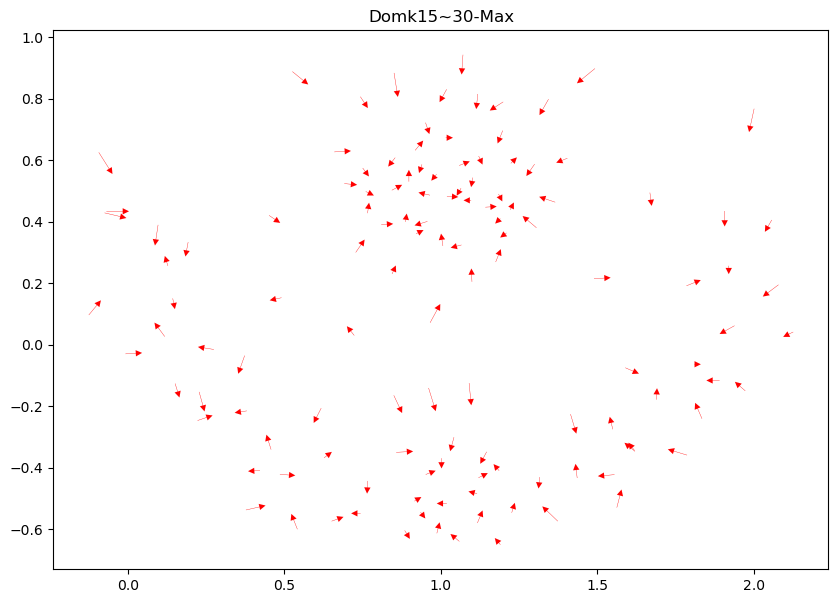

In [13]:
Dom20_15 = vector_k20 - vector_k15
Dom25_20 = vector_k25 - vector_k20
Dom30_25 = vector_k30 - vector_k25
index = MaxValueDetect(downsampled_combined, Dom20_15, Dom25_20,Dom30_25, 10)
print(sum(index))
plt.figure(figsize=(10, 7))
# plt.scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='blue', s=20, marker='+')

# 绘制箭头
for j in range(len(downsampled_combined)):
    if index[j]:
        vector = (Dom20_15[j]+Dom25_20[j]+Dom30_25[j])
        plt.arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], vector[0], vector[1], head_width=0.02, head_length=0.02, linewidth=0.02, fc='red', ec='red')
plt.title('Domk15~30-Max')
plt.show()

126.0


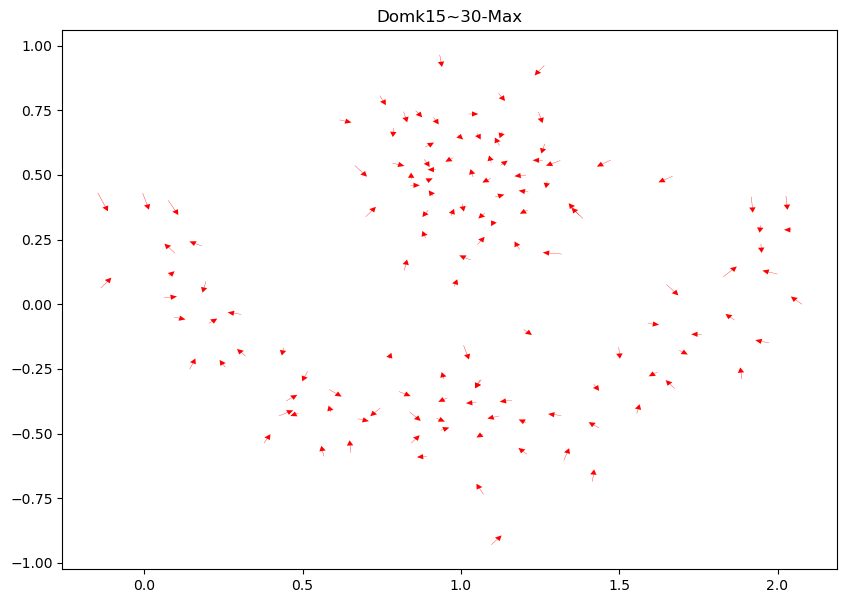

In [18]:
Dom35_30 = vector_k35 - vector_k30
Dom40_35 = vector_k40 - vector_k35
Dom45_40 = vector_k45 - vector_k40
index = MaxValueDetect(downsampled_combined, Dom45_40, Dom40_35,Dom35_30, 10)
print(sum(index))
plt.figure(figsize=(10, 7))
# plt.scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='blue', s=20, marker='+')

# 绘制箭头
for j in range(len(downsampled_combined)):
    if index[j]:
        vector = (Dom45_40[j]+Dom40_35[j]+Dom35_30[j])
        plt.arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], vector[0], vector[1], head_width=0.02, head_length=0.02, linewidth=0.02, fc='red', ec='red')
plt.title('Domk30~45-Max')
plt.show()